# Digit Recognition Project

### **(1) Problem Statement**
The aim of this project is to develop an interactive web application that accurately recognizes handwritten digits. Using a deep learning model trained on the MNIST dataset, the app will allow users to draw digits on a canvas and instantly receive predictions. This project demonstrates the practical application of machine learning in real-time digit recognition.

### **(2) Dataset**
The project utilizes the MNIST dataset, a benchmark dataset in the field of machine learning. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels. It is divided into 60,000 training images and 10,000 testing images. This dataset is widely used for training and testing in the area of image processing and pattern recognition.

### 1. Import Relevant Libraries and Packages

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### 2. Load Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 3. Preprocess Dataset

In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

- **Why Normalization?**
Normalization is an important step in data preprocessing for machine learning models. It scales the input data to a standard range, typically between 0 and 1 or -1 and 1. Normalization helps in improving the performance and convergence of machine learning algorithms by ensuring that all features have a similar scale.

- **Why Reshape?**
The reshape operation is used to transform the shape of an array. In the context of the given code, the reshape operation is used to convert the shape of the input data `X_train` and `X_test` from a 3-dimensional array to a 4-dimensional array.

### 4. Plot Some Input Images 

In [9]:
def plot_input_data(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])   
    plt.show()

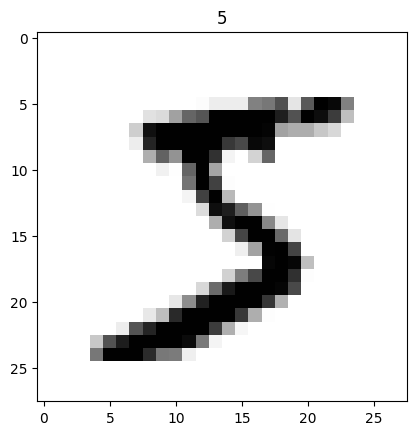

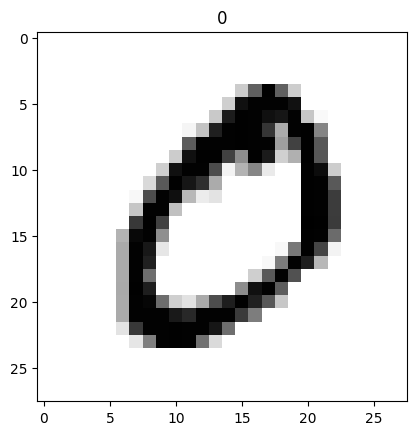

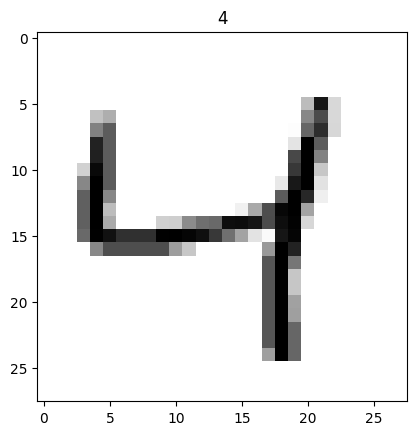

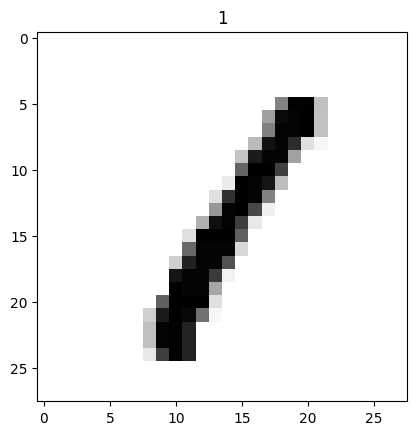

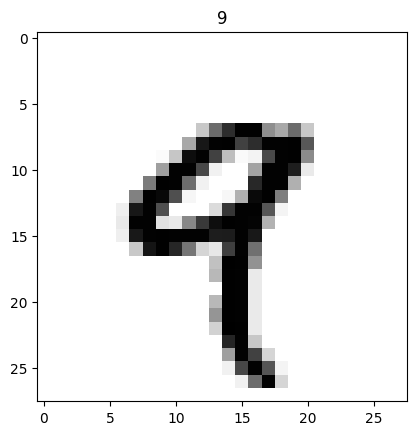

In [10]:
for i in range(5):
    plot_input_data(i)

### 5. Build Model

In [6]:
model = Sequential(
    [Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')]
)

- **Sequential:**
Sequential is a class in Keras that represents a linear stack of layers.It allows you to build a deep learning model by simply adding layers one by one.Each layer added to the Sequential model is connected to the previous layer in the stack.Sequential models are commonly used for building feedforward neural networks.
- **Conv2D:**
Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
- **MaxPooling2D:**
Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
- **Flatten:**
The flatten layer typically appears after the convolutional and pooling layers in convolutional neural network (CNN) architectures.
It acts as a bridge between the convolutional/pooling layers, which extract spatial features, and the fully connected layers, which perform classification or regression tasks.
- **Dense:**
The dense layer is a simple Layer of neurons in which each neuron receives input from all the neurons of the previous layer, thus called as dense. The dense layer is used to classify images based on output from convolutional layers.
- **Dropout:**
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.



### 6. Model Compilation

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- **Why Model Compilation?**
Model compilation is an essential step in training a deep learning model. During model compilation, we specify the optimizer, loss function, and evaluation metrics that will be used to train and evaluate the model.

- In this code, we are using the Adam optimizer, which is a popular optimization algorithm for deep learning models. The loss function is set to 'sparse_categorical_crossentropy', which is suitable for multi-class classification problems. Finally, we specify that we want to track the accuracy metric during training and evaluation.

### 7. Model Training

In [12]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1491 - accuracy: 0.9541 - val_loss: 0.0424 - val_accuracy: 0.9857
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0369 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0376 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0265 -

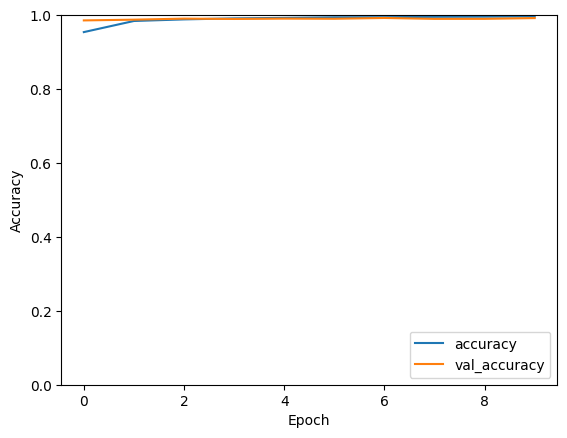

In [13]:
# plot training history
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### 8. Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuray on test data: {(test_acc)*100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.0305 - accuracy: 0.9920
Accuray on test data: 99.20%


### 9. Prediction

In [15]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


### 10. Result Visualization

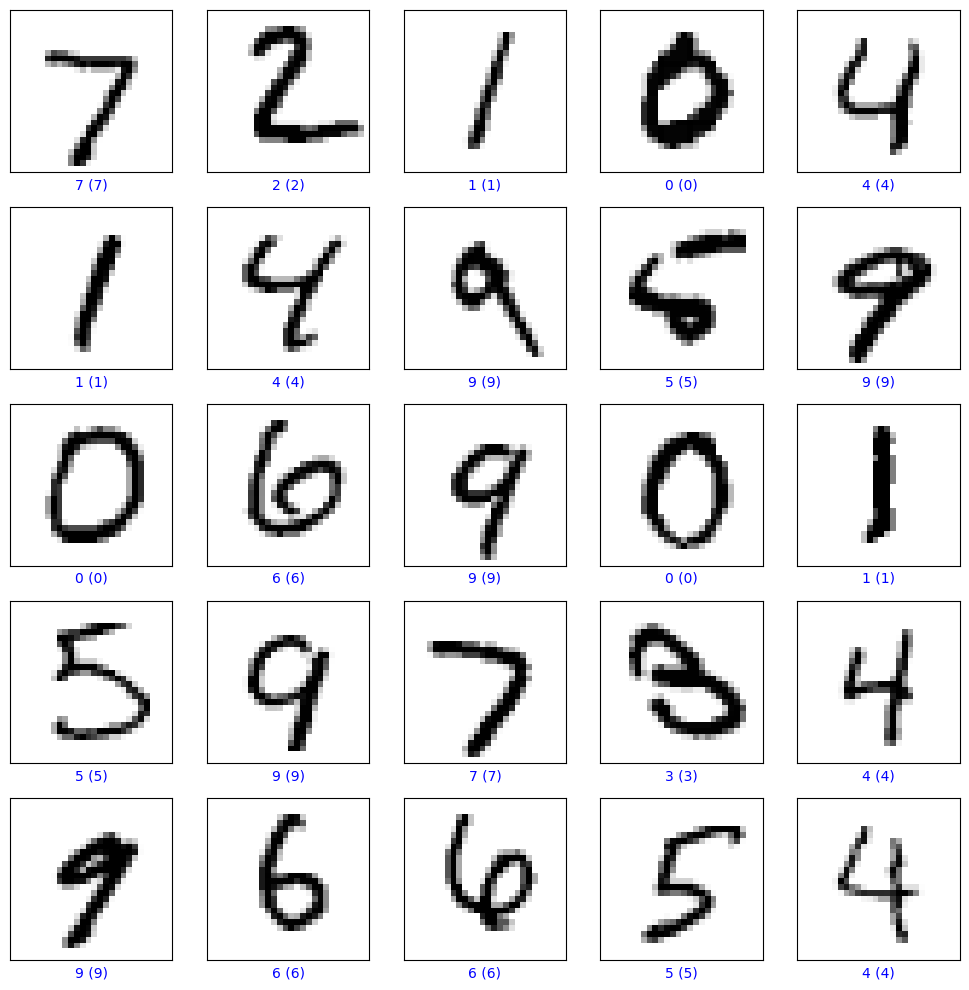

In [16]:
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(predictions[i], y_test[i], X_test[i].reshape(28, 28))
plt.tight_layout()
plt.show()

### 11. Save Model

In [17]:
model.save('mnist_model.h5')

e:\Project\Digit Recognition\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
